<h1 align="center"><font color='Dark blue'>Market Segmentation Analysis using McDonalds Dataset</font></h1>


<p>The purpose of this case study is to illustration of market segmentation
analysis using a different empirical data set.For this case study, imagine that you are McDonald’s, and you would want
to know if consumer segments exist that have a distinctly different image of
McDonald’s. Understanding such systematic differences of brand perceptions by
market segments informs which market segments to focus on, and what messages to
communicate to them. We can choose to focus on market segments with a positive
perception, and strengthen the positive perception. Or we can choose to focus on a
market segment that currently perceives McDonald’s in a negative way. In this case,
we want to understand the key drivers of the negative perception, and modify them.</p>

<p>MSA is done on case study using following steps:<br> 
Step 1: Deciding (not) to Segment <br>
Step 2: Specifying the Ideal Target Segment <br>
Step 3: Collecting Data <br>
Step 4: Exploring Data <br>
Step 5: Extracting Segments<br> 
    5.1 Using k-Means<br>
    5.2 Using Mixtures of Distributions<br> 
    5.3 Using Mixtures of Regression Models<br>
Step 6: Profiling Segments <br>
Step 7: Describing Segments<br>
Step 8: Selecting (the) Target Segment(s) <br>
Step 9: Customising the Marketing Mix<br>
Step 10: Evaluation and Monitoring</p> 

<h2><font color='black'>Import Libraries<font></h2>


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree

<h2><font color='black'>Collecting and Exploring Data<font></h2>

In [89]:
df = pd.read_csv('mcdonalds.csv')

In [94]:
df.shape

(1453, 15)

In [91]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [98]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [95]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [90]:
df.head

<bound method NDFrame.head of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gende

In [69]:
Md_x = df.iloc[:, 0:11].values
MD_x = (Md_x == "Yes").astype(int)
result = np.round(np.mean(MD_x, axis=0), 2)
print(result)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


Explained variance ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Singular values: [28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]
[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


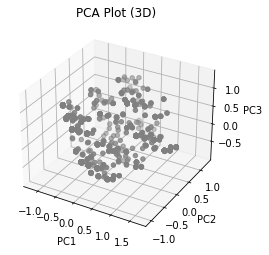

In [70]:
# PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Singular values:", pca.singular_values_)
print(np.round(MD_pca, 1))

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(MD_pca[:, 0], MD_pca[:, 1], MD_pca[:, 2], color='grey')
ax.set_title('PCA Plot (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()



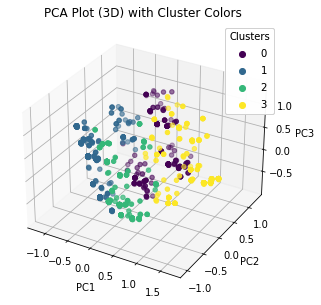

In [67]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')



scatter = ax.scatter(MD_pca[:, 0], MD_pca[:, 1], MD_pca[:, 2], c=MD_kmeans_4, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('PCA Plot (3D) with Cluster Colors')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

<h2><font color='black'>Extracting Segments<font></h2>

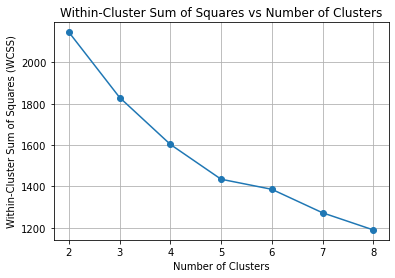

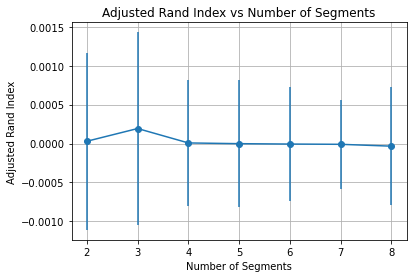

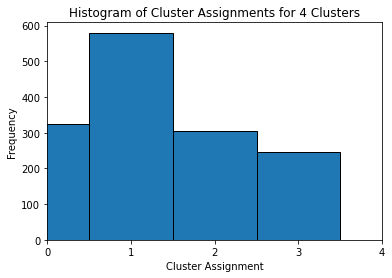

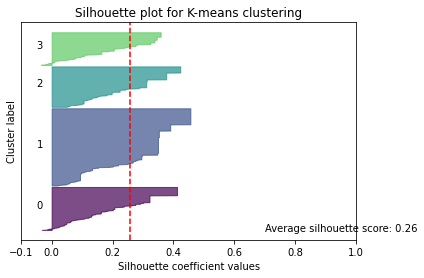

In [43]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt



wcss = []
cluster_results = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_assignments = kmeans.fit_predict(MD_x)
    wcss.append(kmeans.inertia_)
    cluster_results[k] = cluster_assignments


    
    
plt.plot(range(2, 9), wcss, marker='o')
plt.title('Within-Cluster Sum of Squares vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()



bootstrap_results = {}
for k in range(2, 9):
    bootstrap_cluster_assignments = []
    for _ in range(100):
        bootstrap_sample = resample(MD_x)
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        cluster_assignments = kmeans.fit_predict(bootstrap_sample)
        bootstrap_cluster_assignments.append(cluster_assignments)
    bootstrap_results[k] = bootstrap_cluster_assignments


    
adjusted_rand_indices = {}
for k, cluster_assignments_list in bootstrap_results.items():
    aris = []
    for cluster_assignments in cluster_assignments_list:
        true_labels = np.random.choice(range(2), len(cluster_assignments))
        aris.append(adjusted_rand_score(true_labels, cluster_assignments))
    adjusted_rand_indices[k] = aris

plt.errorbar(range(2, 9), [np.mean(adjusted_rand_indices[k]) for k in range(2, 9)],
             yerr=[np.std(adjusted_rand_indices[k]) for k in range(2, 9)], fmt='-o')
plt.title('Adjusted Rand Index vs Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()



MD_kmeans_4 = cluster_results[4]
plt.hist(MD_kmeans_4, bins=range(5), align='left', edgecolor='black')
plt.xlabel('Cluster Assignment')
plt.ylabel('Frequency')
plt.xlim(0, 4)
plt.xticks(range(5))
plt.title('Histogram of Cluster Assignments for 4 Clusters')
plt.show()


silhouette_scores = silhouette_samples(MD_x, MD_kmeans_4)
overall_silhouette_score = silhouette_score(MD_x, MD_kmeans_4)
fig, ax = plt.subplots()
y_lower = 10
for i in range(4):
    cluster_silhouette_scores = silhouette_scores[MD_kmeans_4 == i]
    cluster_silhouette_scores.sort()

    size_cluster_i = cluster_silhouette_scores.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_scores,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.set_title("Silhouette plot for K-means clustering")
ax.axvline(x=overall_silhouette_score, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax.text(0.7, 2, "Average silhouette score: {:.2f}".format(overall_silhouette_score))
plt.show()


<h2><font color='black'>Profiling Segments<font></h2>

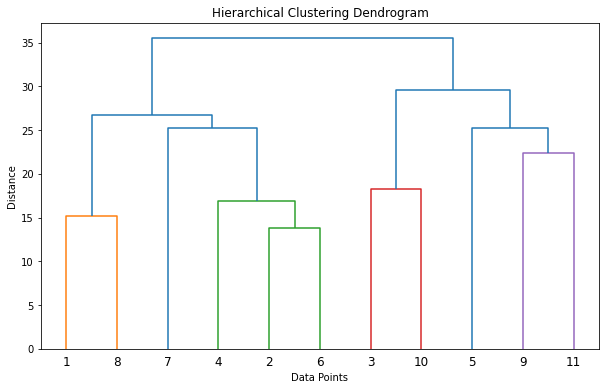

In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(MD_x.T, method='complete', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=range(1, MD_x.shape[1] + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


<h2><font color='black'>Decribing Segments<font></h2>

<Figure size 720x432 with 0 Axes>

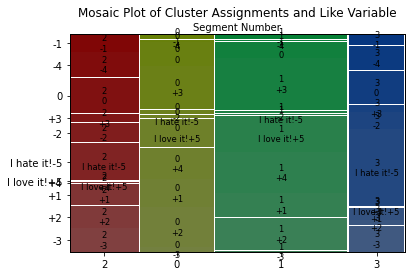

<Figure size 720x432 with 0 Axes>

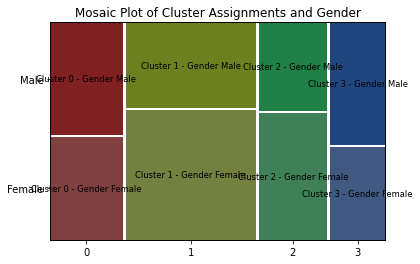

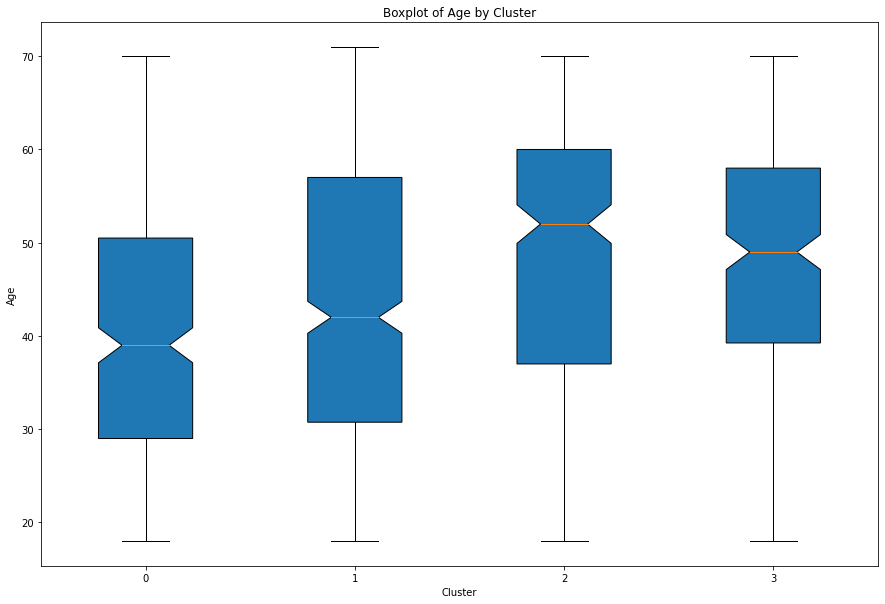

In [42]:
# Mosaic Plot of Cluster Assignments and Like Variable
from statsmodels.graphics.mosaicplot import mosaic

data = pd.DataFrame({'Cluster': MD_kmeans_4, 'Like': df['Like']})

plt.figure(figsize=(10, 6))
mosaic(data, ['Cluster', 'Like'], title='Mosaic Plot of Cluster Assignments and Like Variable')
plt.xlabel('Segment Number')
plt.show()

# Mosaic Plot of Cluster Assignments and Gender
contingency_table = pd.crosstab(MD_kmeans_4, df['Gender'])

plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), title='Mosaic Plot of Cluster Assignments and Gender',
       labelizer=lambda k: f'Cluster {k[0]} - Gender {k[1]}', gap=0.01)
plt.show()



# Boxplot of Age by Cluster
plt.figure(figsize=(15, 10))
plt.boxplot([df[MD_kmeans_4 == cluster]['Age'] for cluster in np.unique(MD_kmeans_4)],
            labels=np.unique(MD_kmeans_4), patch_artist=True, notch=True)
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Boxplot of Age by Cluster')
plt.show()





<h2><font color='black'>Extracting Target Segments<font></h2>

In [76]:
# Define a mapping dictionary
frequency_mapping = {
    'Never': 0,
    'Once a month': 1,
    'More than once a week': 3,
    'Once a week': 4,
    'Every three months': 2,
    'Once a year': 5
}

# Map the VisitFrequency column using the mapping dictionary
df['VisitFrequencyNumeric'] = df['VisitFrequency'].map(frequency_mapping)

# Calculate the mean visit frequency by cluster
visit_mean = df.groupby(MD_kmeans_4)['VisitFrequencyNumeric'].mean()
print("Mean Visit Frequency by Cluster:\n", visit_mean)


Mean Visit Frequency by Cluster:
 0    2.374613
1    2.298276
2    2.651316
3    2.353659
Name: VisitFrequencyNumeric, dtype: float64


In [77]:
from sklearn.preprocessing import LabelEncoder
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby(MD_kmeans_4)['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,index,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


Mean Visit Frequency by Cluster:
 0    2.374613
1    2.298276
2    2.651316
3    2.353659
Name: VisitFrequencyNumeric, dtype: float64
Mean Like Score by Cluster:
    index  MeanLikeScore
0      0       3.798762
1      1       3.794828
2      2       5.430921
3      3       6.739837
Proportion of Females in Each Cluster:
 0    0.476780
1    0.601724
2    0.588816
3    0.430894
Name: Gender, dtype: float64


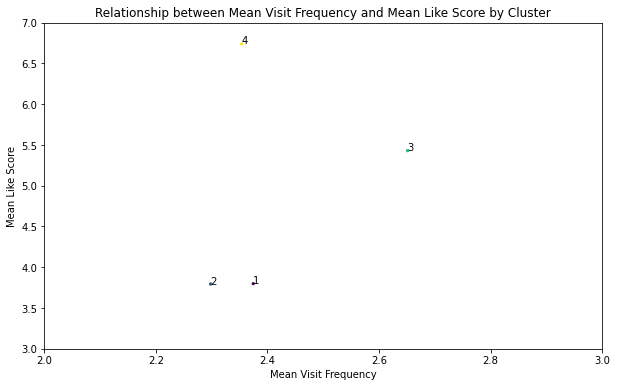

In [79]:
#  Mean Visit Frequency by Cluster
visit_mean = df.groupby(MD_kmeans_4)['VisitFrequencyNumeric'].mean()
print("Mean Visit Frequency by Cluster:\n", visit_mean)

# Mean Like Score by Cluster
like_mean = df.groupby(MD_kmeans_4)['Like'].mean()
like_mean = like_mean.reset_index(name='MeanLikeScore')
print("Mean Like Score by Cluster:\n", like_mean)

# Proportion of Females in Each Cluster
female_proportion = df['Gender'].eq('Female').groupby(MD_kmeans_4).mean()
print("Proportion of Females in Each Cluster:\n", female_proportion)

# Scatter plot of Mean Visit Frequency vs. Mean Like Score by Cluster
plt.figure(figsize=(10, 6))
plt.scatter(visit_mean, like_mean['MeanLikeScore'], s=10 * female_proportion, c=np.arange(1, len(visit_mean) + 1))
plt.xlim(2, 3)
plt.ylim(3, 7)
for i, txt in enumerate(range(1, len(visit_mean) + 1)):
    plt.text(visit_mean[i], like_mean['MeanLikeScore'][i], txt)
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Score')
plt.title('Relationship between Mean Visit Frequency and Mean Like Score by Cluster')
plt.show()



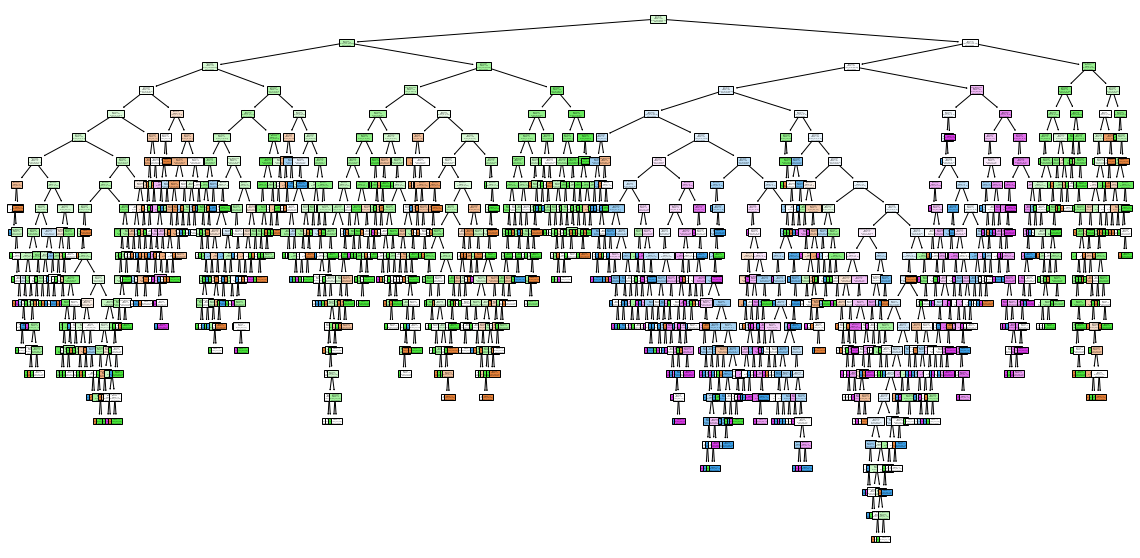

In [80]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(MD_kmeans_4)  # MD_kmeans_4 contains cluster labels
X = df[['Like', 'Age', 'VisitFrequencyNumeric', 'Gender']]  # Adjust column names
X_encoded = pd.get_dummies(X, drop_first=True)

# Initialize and train the decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_encoded, y)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_encoded.columns, class_names=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], filled=True)
plt.show()
